In [2]:
import numpy as np
import functools
import matplotlib.pyplot as plt
import pandas as pd
from torchsummary import summary
import os
import pathlib
import torchio
from torchvision.transforms import *
import random
%matplotlib inline

In [9]:
import nilearn
import nibabel as nib
from nilearn import plotting
from nilearn.plotting import plot_anat

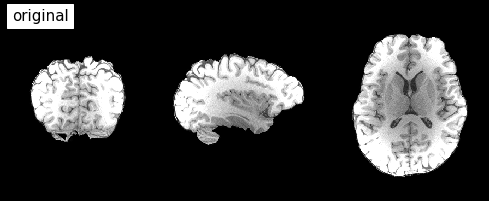

In [6]:
plot_anat('/home/datasets/HCP_T1_fsl/hcp_t1_fsl/100206_3T_T1w_MPR1_bet.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)

/usr/local/lib/python3.6/dist-packages/nilearn/image/resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


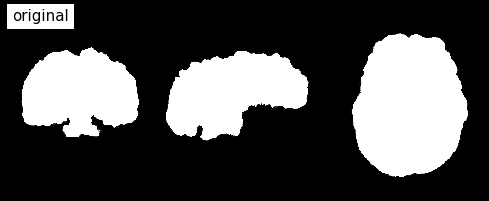

In [7]:
plot_anat('/home/datasets/HCP_T1_fsl/hcp_t1_fsl/100206_3T_T1w_MPR1_bet_mask.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)

In [91]:
#example
nii_path = '/home/datasets/HCP_T1/167743/unprocessed/3T/T1w_MPR1/167743_3T_T1w_MPR1.nii.gz'
mask_path = '/home/datasets/HCP_T1_fsl/HCP_T1_pm/167743_3T_T1w_MPR1_bet_mask.nii.gz'
ex = nib.load(nii_path).get_data()

full_mask = nib.load(mask_path).get_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [75]:
ex.shape

(256, 320, 320)

In [76]:
full_mask.shape

(256, 320, 320)

In [80]:
masked_image = ex.copy()
masked_image[full_mask == 0] = 0

In [79]:
masked_image.shape

(256, 320, 320)

In [84]:
masked_image[np.newaxis,:,:,:].shape

(1, 256, 320, 320)

In [94]:
from tqdm import tqdm

In [95]:
#for all 1113 sub
PATH_TO_MRI = '/home/datasets/HCP_T1'
PATH_TO_MASK = '/home/datasets/HCP_T1_fsl'
for i, sub in tqdm(enumerate(os.listdir(PATH_TO_MRI))):
    if len(sub) == 6: 
        full_path = '{}/{}/unprocessed/3T/T1w_MPR1/{}_3T_T1w_MPR1.nii.gz'.format(PATH_TO_MRI, sub, sub)
        if os.path.exists(full_path):
            mask_path = '{}/hcp_t1_fsl/{}_3T_T1w_MPR1_bet_mask.nii.gz'.format(PATH_TO_MASK, sub)
            img = nib.load(full_path).get_data()
            full_mask = nib.load(mask_path).get_data()
            masked_image = img.copy()
            masked_image[full_mask == 0] = 0
            nib.save(nib.Nifti1Image(masked_image, affine=None), '{}/HCP_T1_pm/{}_3T_T1w_MPR1_bet_mask.nii.gz'.format(PATH_TO_MASK, sub))
#         if i%10 == 0:
#             print('{} iteration is finished.'.format(i))
        

0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # Remove the CWD from sys.path while we load stuff.
1114it [1:15:03,  4.04s/it]


In [85]:
def plot_central_cuts(img, title="", t=None):
    """
    param image: tensor or np array of shape (CxDxHxW) if t is None
    param image: tensor or np array of shape (TxCxDxHxW) if t is not None
    """
    if t is not None:
        img = img[t]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3 * 6, 6))
    fig.suptitle(title)
    axes[0].imshow(img[0, img.shape[1] // 2, :, :])
    axes[1].imshow(img[0, :, img.shape[2] // 2, :])
    axes[2].imshow(img[0, :, :, img.shape[3] // 2])
    plt.show()

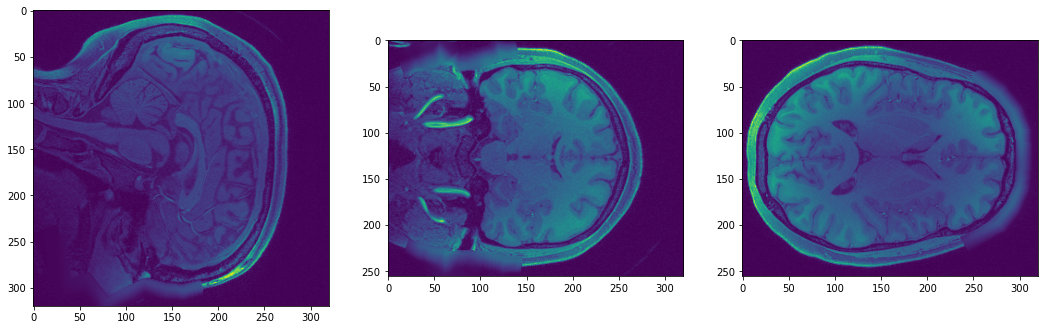

In [90]:
 plot_central_cuts(ex[np.newaxis,:,:,:])

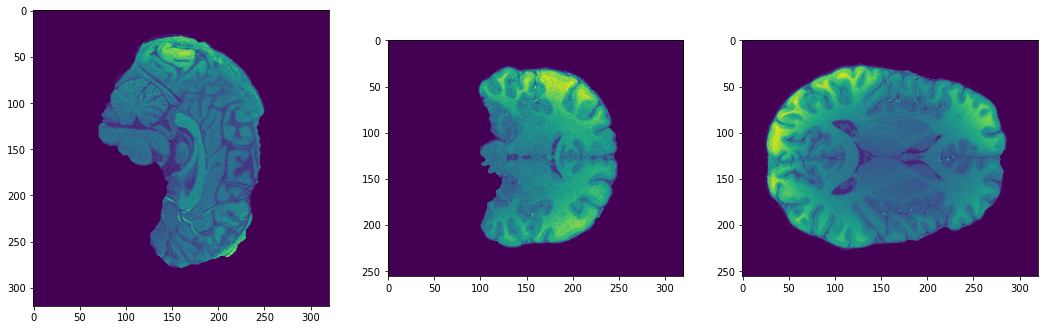

In [92]:
 plot_central_cuts(full_mask[np.newaxis,:,:,:])